In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [2]:
#BBC, CBS, CNN, Fox News, New York Times
user_id = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

results_list = []

for user in user_id:
    counter = 1
    
    for item in tweepy.Cursor(api.user_timeline, id = user).items(100):
        
        tweet = json.dumps(item._json, indent = 3)
        tweet = json.loads(tweet)
        text = tweet["text"]
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        positive = analyzer.polarity_scores(text)["pos"]
        neutral = analyzer.polarity_scores(text)["neu"]
        negative = analyzer.polarity_scores(text)["neg"]
            
        user_results = {"Username": user, "Date Created": tweet["created_at"], 
                    "Tweet Count": counter, "Compound Score": compound, "Postive Score": positive, 
                    "Neutral Score": neutral,"Negative Score": negative, "Text": text}
    
        results_list.append(user_results)
    
        counter += 1


In [3]:
# Create DataFrame from Results List

results_df = pd.DataFrame.from_dict(results_list)
results_df.head()

,Compound Score,Date Created,Negative Score,Neutral Score,Postive Score,Text,Tweet Count,Username
0,0.4939,Wed Oct 03 19:04:04 +0000 2018,0.0,0.819,0.181,The search for Lord Sugar's next business part...,1,@BBC
1,0.0000,Wed Oct 03 17:59:01 +0000 2018,0.0,1.000,0.000,🎧❤️ Dementia playlists are making such a big d...,2,@BBC
2,0.5411,Wed Oct 03 17:03:42 +0000 2018,0.0,0.851,0.149,RT @BBCnireland: ✍ @BBCApprentice is back toni...,3,@BBC
3,0.4404,Wed Oct 03 16:55:01 +0000 2018,0.0,0.868,0.132,❤️ Couples will soon be able to choose a civil...,4,@BBC
4,0.0000,Wed Oct 03 15:58:03 +0000 2018,0.0,1.000,0.000,🍜 The humble origins of an incredibly versatil...,5,@BBC


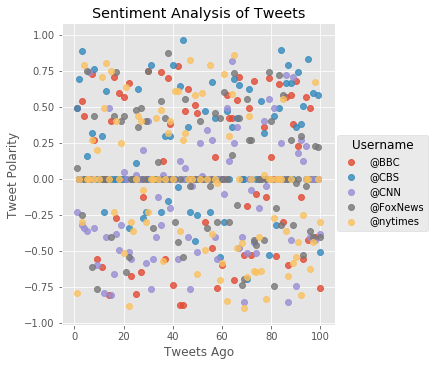

<Figure size 432x288 with 0 Axes>

In [4]:
sns.lmplot(x = "Tweet Count", y = "Compound Score", data = results_df, fit_reg=False, hue = "Username")
plt.title("Sentiment Analysis of Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.show()

plt.savefig("Twitter Scatterplot.png")

#plt.scatter("Tweet Count", "Compound Score", marker="o", facecolors="green", edgecolors="black", alpha=0.80)
#need to figure out how to tell to color for each


#plt.grid(True)
#plt.ylim(0,130)
#plt.xlim(0,100)


#plt.show()

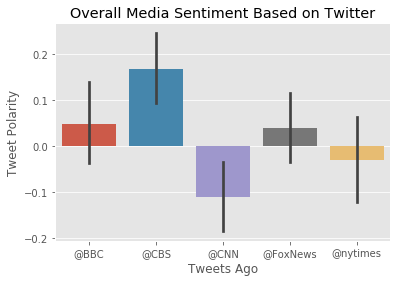

<Figure size 432x288 with 0 Axes>

In [5]:
sns.barplot(x = "Username", y = "Compound Score", data = results_df)
plt.title("Overall Media Sentiment Based on Twitter")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.show()

plt.savefig("Twitter bar graph.png")
#ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

In [ ]:
# Notes

# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()


###

import plotly.plotly as py
import plotly.tools as tls

import matplotlib.pyplot as plt
import numpy as np

colors = ['b', 'c', 'y', 'm', 'r']

lo = plt.scatter(random(10), random(10), marker='x', color=colors[0])
ll = plt.scatter(random(10), random(10), marker='o', color=colors[0])
l  = plt.scatter(random(10), random(10), marker='o', color=colors[1])
a  = plt.scatter(random(10), random(10), marker='o', color=colors[2])
h  = plt.scatter(random(10), random(10), marker='o', color=colors[3])
hh = plt.scatter(random(10), random(10), marker='o', color=colors[4])
ho = plt.scatter(random(10), random(10), marker='x', color=colors[4])

text = iter(['Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'])


mpl_fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly( mpl_fig )

for dat in plotly_fig['data']:
    t = text.next()
    dat.update({'name': t, 'text':t})

plotly_fig['layout']['showlegend'] = True
py.iplot(plotly_fig, filename = 'mpl-scatter-legend-label')

###

# Target User Accounts
target_user = ("@DalaiLama", "@realdonaldtrump", "@katyperry")

# List for dictionaries of results
results_list = []

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(1, 11):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

    # Create a dictionaty of results
    user_results = {
        "Username": user,
        "Compound Score": np.mean(compound_list),
        "Postive Score": np.mean(positive_list),
        "Neutral Score": np.mean(neutral_list),
        "Negative Score": np.mean(negative_list)
    }

    # Append dictionary to list
    results_list.append(user_results)

    # Print the Averages
    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.3f}")
    print(f"Positive: {np.mean(positive_list):.3f}")
    print(f"Neutral: {np.mean(neutral_list):.3f}")
    print(f"Negative: {np.mean(negative_list):.3f}")